In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Loading the data from the file

#url = 'https://raw.githubusercontent.com/Sai2000-20/Covid_Cases_TestKits_TimeSeriesPrediction-SARIMA/main/Data/owid-covid-data.csv'
#df = pd.read_csv(url)


df = pd.read_csv('C:\\Users\\Desktop\\ML\\Individual_Assignment-Project\\Data\\owid-covid-data.csv')

df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,24/2/2020,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,25/2/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,26/2/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,27/2/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,28/2/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57799,ZWE,Africa,Zimbabwe,29/12/2020,13325.0,177.0,111.571,359.0,5.0,4.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57800,ZWE,Africa,Zimbabwe,30/12/2020,13625.0,300.0,138.429,360.0,1.0,4.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57801,ZWE,Africa,Zimbabwe,31/12/2020,13867.0,242.0,154.429,363.0,3.0,3.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57802,ZWE,Africa,Zimbabwe,1/1/2021,14084.0,217.0,172.000,369.0,6.0,4.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [2]:
# Describing the data.
df.describe
# It has 52 columns and 57804 rows. I will filter for the required 7 columns only that help achive my 2 objectives.

<bound method NDFrame.describe of       iso_code continent     location        date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan   24/2/2020          1.0        1.0   
1          AFG      Asia  Afghanistan   25/2/2020          1.0        0.0   
2          AFG      Asia  Afghanistan   26/2/2020          1.0        0.0   
3          AFG      Asia  Afghanistan   27/2/2020          1.0        0.0   
4          AFG      Asia  Afghanistan   28/2/2020          1.0        0.0   
...        ...       ...          ...         ...          ...        ...   
57799      ZWE    Africa     Zimbabwe  29/12/2020      13325.0      177.0   
57800      ZWE    Africa     Zimbabwe  30/12/2020      13625.0      300.0   
57801      ZWE    Africa     Zimbabwe  31/12/2020      13867.0      242.0   
57802      ZWE    Africa     Zimbabwe    1/1/2021      14084.0      217.0   
57803      ZWE    Africa     Zimbabwe    2/1/2021      14491.0      407.0   

       new_cases_smoothed  total_deaths  

In [3]:
#extracting the required 7 columns - 'iso_code','location','date','total_cases','new_cases','total_tests','new_tests'
df=df[['iso_code','location','date','total_cases','new_cases','total_tests','new_tests']]
df
#57804 rows × 7 columns

,iso_code,location,date,total_cases,new_cases,total_tests,new_tests
0,AFG,Afghanistan,24/2/2020,1.0,1.0,NaN,NaN
1,AFG,Afghanistan,25/2/2020,1.0,0.0,NaN,NaN
2,AFG,Afghanistan,26/2/2020,1.0,0.0,NaN,NaN
3,AFG,Afghanistan,27/2/2020,1.0,0.0,NaN,NaN
4,AFG,Afghanistan,28/2/2020,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
57799,ZWE,Zimbabwe,29/12/2020,13325.0,177.0,212115.0,2373.0
57800,ZWE,Zimbabwe,30/12/2020,13625.0,300.0,214577.0,2462.0
57801,ZWE,Zimbabwe,31/12/2020,13867.0,242.0,NaN,NaN
57802,ZWE,Zimbabwe,1/1/2021,14084.0,217.0,NaN,NaN


In [4]:
#Checking the datatypes of the columns 
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57804 entries, 0 to 57803
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iso_code     57473 non-null  object 
 1   location     57802 non-null  object 
 2   date         57804 non-null  object 
 3   total_cases  57244 non-null  float64
 4   new_cases    57236 non-null  float64
 5   total_tests  26706 non-null  float64
 6   new_tests    26742 non-null  float64
dtypes: float64(4), object(3)
memory usage: 3.1+ MB


Count of Null values is 63621 and Not null values is 341007


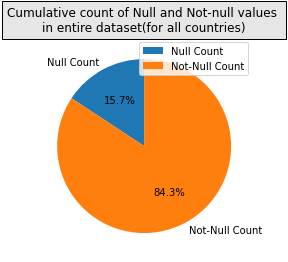

In [5]:
#Check for null and not null values in the dataset

print('Count of Null values is {} and Not null values is {}'.format(df.isnull().sum().sum(),df.notnull().sum().sum()))

#Plotting Null and Not null values
import matplotlib.pyplot as plt
counts=[df.isnull().sum().sum(),df.notnull().sum().sum()]
labels=['Null Count','Not-Null Count']

#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values which need to be cleaned up.
plt.title("Cumulative count of Null and Not-null values \n" + "in entire dataset(for all countries)", bbox={'facecolor':'0.9', 'pad':5})
plt.show()


## Data Cleanup for location = Malaysia

In [6]:
# Checking 'location' column has  null, and missing country name
df[df['location'].isnull()==True] 

,iso_code,location,date,total_cases,new_cases,total_tests,new_tests
31645,MYS,NaN,7/2/2020,12.0,0.0,0.0,0.0
31646,MYS,NaN,8/2/2020,16.0,4.0,0.0,0.0


In [7]:
#'iso_code' column has  null, and missing country name

df[df['iso_code'].isnull()==True]


,iso_code,location,date,total_cases,new_cases,total_tests,new_tests
23980,NaN,International,7/2/2020,61.0,61.0,NaN,NaN
23981,NaN,International,8/2/2020,61.0,0.0,NaN,NaN
23982,NaN,International,9/2/2020,64.0,3.0,NaN,NaN
23983,NaN,International,10/2/2020,135.0,71.0,NaN,NaN
23984,NaN,International,11/2/2020,135.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
24306,NaN,International,29/12/2020,721.0,0.0,NaN,NaN
24307,NaN,International,30/12/2020,721.0,0.0,NaN,NaN
24308,NaN,International,31/12/2020,721.0,0.0,NaN,NaN
24309,NaN,International,1/1/2021,721.0,0.0,NaN,NaN


In [8]:
#If iso_code and location is null then drop the record
for index, row in df.iterrows(): 
    if df.loc[index, 'location'] is None :    
        if df.loc[index, 'iso_code'] is None :
            df.drop(index)
print('Dropped records where location and iso_code is null')

Dropped records where location and iso_code is null


In [9]:
#Correct invalid iso_code values for location Malaysia
for index, row in df.iterrows(): 
    if df.loc[index, 'location'] =='Malaysia' :
        if df.loc[index, 'iso_code']!='MYS' :
            df.loc[index, 'iso_code']='MYS'
print('Replaced invalid iso_code values for location Malaysia')

Replaced invalid iso_code values for location Malaysia


In [10]:
#Correct invalid location values for iso_code MYS
for index, row in df.iterrows(): 
    if df.loc[index, 'iso_code'] =='MYS' :
        if df.loc[index, 'location']!='Malaysia' :
            df.loc[index, 'location']='Malaysia'
print('Replaced invalid location values for iso_code MYS ')

Replaced invalid location values for iso_code MYS 


In [11]:
#We filter records for iso_code = MYS. This gives all records for Malaysia.
df=df[df['iso_code']=='MYS']
df
# I get 344 rows x 7 columns

,iso_code,location,date,total_cases,new_cases,total_tests,new_tests
31632,MYS,Malaysia,25/1/2020,3.0,3.0,0.0,0.0
31633,MYS,Malaysia,26/1/2020,4.0,1.0,0.0,0.0
31634,MYS,Malaysia,27/1/2020,4.0,0.0,0.0,0.0
31635,MYS,Malaysia,28/1/2020,4.0,0.0,0.0,0.0
31636,MYS,Malaysia,29/1/2020,7.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...
31971,MYS,Malaysia,29/12/2020,108615.0,1925.0,3291834.0,19954.0
31972,MYS,Malaysia,30/12/2020,110485.0,1870.0,3317646.0,25812.0
31973,MYS,Malaysia,31/12/2020,113010.0,2525.0,3343458.0,NaN
31974,MYS,Malaysia,1/1/2021,115078.0,2068.0,3369270.0,NaN


In [12]:
#Check for missing date values
from datetime import datetime as dt


df_cases_my=df.sort_values(by=['total_cases'])

print('Null date count is {}'.format(df_cases_my['date'].isnull().sum()))

for index, row in df_cases_my.iterrows():
    if df_cases_my.loc[index, 'date'].isspace() :
        if pd.isnull(df_cases_my.loc[index, 'total_cases']):
            df_cases_my.drop(index)#drop these rows
        else:
            
            missing_date=(pd.to_datetime(df_cases.loc[(index-1), 'date'],format="%Y-%m-%d")+ datetime.timedelta(days=1)).strftime("%Y-%m-%d")
            
            df_cases_my.loc[index,'date']=missing_date   

Null date count is 0


For Malaysia total count of null values is 53 and not null values is 2355 


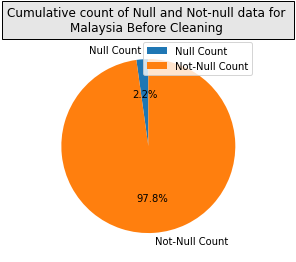

In [13]:
# Checking for NULL values in all columns for location = Malaysia
print('For Malaysia total count of null values is {} and not null values is {} '.format(df.isnull().sum().sum(),df.notnull().sum().sum()))

counts=[df.isnull().sum().sum(),df.notnull().sum().sum()]
labels=['Null Count','Not-Null Count']

patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")

#There are a few null values which need to be cleaned up.
plt.title("Cumulative count of Null and Not-null data for \n" + "Malaysia Before Cleaning ", bbox={'facecolor':'0.9', 'pad':5})
plt.show()

In [14]:
#Check for datatype for each value in the columns in data 
if df.dtypes['new_tests']!= np.float64:
    print('Invalid data in columns new_tests')
else:
    print('Column new_tests datatype is fine')
    
if df.dtypes['total_cases']!= np.float64:
    print('Invalid data in columns total_cases')
else:
    print('Column total_cases datatype is fine')
    
if df.dtypes['new_cases']!= np.float64:
    print('Invalid data in columns new_cases')
else:
    print('Column new_cases datatype is fine')
    
if df.dtypes['total_tests']!= np.float64:
    print('Invalid data in columns total_tests')
else:
    print('Column total_tests datatype is fine')
    
if df.dtypes['iso_code']!= np.object:
    print('Invalid data in columns iso_code')
else:
    print('Column iso_code datatype is fine')
    
if df.dtypes['location']!= np.object:
    print('Invalid data in columns location')
else:
    print('Column location datatype is fine')
    
if df.dtypes['date']!= np.object:
    print('Invalid data in columns date')
else:
    print('Column date datatype is fine')

Column new_tests datatype is fine
Column total_cases datatype is fine
Column new_cases datatype is fine
Column total_tests datatype is fine
Column iso_code datatype is fine
Column location datatype is fine
Column date datatype is fine


Column new_cases has 1 null values . Kindly handle it


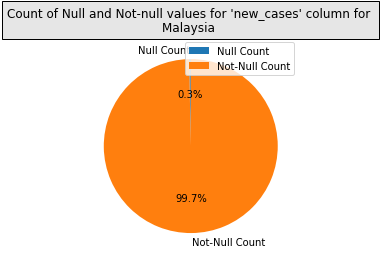

In [15]:
# Checking if 'new_cases' column has null, and missing value
df_temp=df[df['new_cases'].isnull()==True]

if df['new_cases'].isnull().sum()==0:
    print('Column new_cases has no null values')
else:
    print('Column new_cases has {} null values . Kindly handle it'.format(df['new_cases'].isnull().sum()))

df_temp

#Graphical representation of checking 'if 'new_cases' column has`  null, and missing value

counts=[df['new_cases'].isnull().sum().sum(),df['new_cases'].notnull().sum().sum()]
labels=['Null Count','Not-Null Count']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values whihc need to be cleaned up.
plt.title("Count of Null and Not-null values for 'new_cases' column for \n" + "Malaysia ", bbox={'facecolor':'0.9', 'pad':5})
plt.show()


In [16]:
# Clean data for column 'new_cases' with null and missing value
import math

for index, row in df.iterrows(): 
    if np.isnan(df.loc[index, 'new_cases']):#check is 'new_cases' column has  null, and missing values
        if np.isnan(df.loc[index, 'total_cases']):# check if 'total_cases' column has  null, and missing values
            df.drop(index)#Delete the data record
        else:
            df.loc[index, 'new_cases'] =  df.loc[index , 'total_cases']-df.loc[(index - 1), 'total_cases']
            #Arrange df as per 'total_cases' column in ascending order new_cases' = current 'total_cases' value - previous 'total_cases' value


Column new_cases has no null values


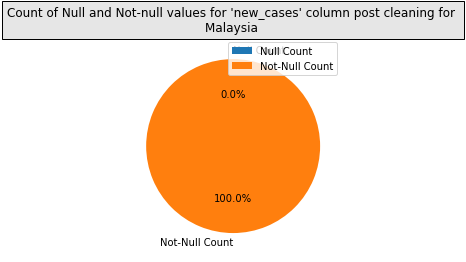

In [17]:
#Graphical representation of 'new_cases' column having no null and missing value post cleaning 
if df['new_cases'].isnull().sum()==0:
    print('Column new_cases has no null values')
else:
    print('Column new_cases has {} null values . Kindly handle it'.format(df['new_cases'].isnull().sum()))

counts=[df['new_cases'].isnull().sum().sum(),df['new_cases'].notnull().sum().sum()]
labels=['Null Count','Not-Null Count']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values which need to be cleaned up.
plt.title("Count of Null and Not-null values for 'new_cases' column post cleaning for \n" + "Malaysia ", bbox={'facecolor':'0.9', 'pad':5})
plt.show()

Column new_tests has 52 null values . Kindly handle it


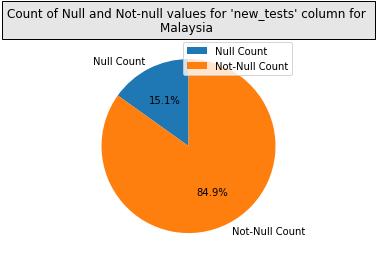

In [18]:
#Check if column 'new_tests' has  null values

df[df['new_tests'].isnull()==True]
if df['new_tests'].isnull().sum()==0:
    print('Column new_tests has no null values')
else:
    print('Column new_tests has {} null values . Kindly handle it'.format(df['new_tests'].isnull().sum()))

#Graphical representation of checking 'if 'new_tests' column has null, and missing value

counts=[df['new_tests'].isnull().sum().sum(),df['new_tests'].notnull().sum().sum()]
labels=['Null Count','Not-Null Count']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values whihc need to be cleaned up.
plt.title("Count of Null and Not-null values for 'new_tests' column for \n" + "Malaysia ", bbox={'facecolor':'0.9', 'pad':5})
plt.show()


In [19]:
# Clean data for column 'new_tests' with null and missing value
import math
print(df['new_tests'].isnull().sum())
for index, row in df.iterrows(): 
    if np.isnan(df.loc[index, 'new_tests']):#'new_tests' column has null and missing values
        if np.isnan(df.loc[index, 'total_tests']) or df.loc[index, 'total_tests']==0.0:#'total_tests' column has null and missing values
            #print(df.loc[index])
            df.drop(index)#Delete the data record
        else:
            df.loc[index, 'new_tests'] =  df.loc[index , 'total_tests']-df.loc[(index - 1), 'total_tests']
            #print(df['new_tests'].isnull().sum())
df[df['new_tests'].isnull()]
   # Arrange df as per 'total_tests' column in ascending order new_tests' = current 'total_tests' value - previous 'total_tests' value 

52


,iso_code,location,date,total_cases,new_cases,total_tests,new_tests


Column new_tests has no null values


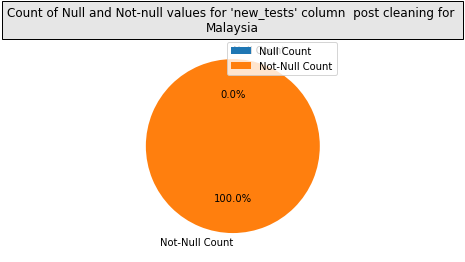

In [20]:
#Check if column new_tests has null values after cleaning

if df['new_tests'].isnull().sum()==0.0:
    print('Column new_tests has no null values')
else:
    print('Column new_tests has {} null values . Kindly handle it'.format(df['new_tests'].isnull().sum()))

#Graphical representation of checking 'if 'new_tests' column has null, and missing value

counts=[df['new_tests'].isnull().sum().sum(),df['new_tests'].notnull().sum().sum()]
labels=['Null Count','Not-Null Count']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values whihc need to be cleaned up.
plt.title("Count of Null and Not-null values for 'new_tests' column  post cleaning for \n" + "Malaysia", bbox={'facecolor':'0.9', 'pad':5})
plt.show()

Dataset has no null values


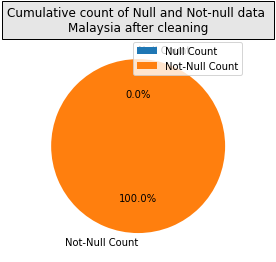

In [21]:
#Check if dataset has null values for any of required columns

if df.isnull().sum().sum()==0:
    print('Dataset has no null values')
else:
    print('Dataset have {} null values . Kindly handle it'.format(df.isnull().sum().sum()))

#Graphical representation of checking 'if dataset has`  null, and missing value
counts=[df.isnull().sum().sum(),df.notnull().sum().sum()]
labels=['Null Count','Not-Null Count']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(counts, colors=colors, startangle=90)
patches, texts, junk  = plt.pie(counts, autopct='%1.1f%%',labels=labels,startangle=90)
plt.legend(patches, labels, loc="upper right")
#There are a few null values whihc need to be cleaned up.
plt.title("Cumulative count of Null and Not-null data \n" + "Malaysia after cleaning", bbox={'facecolor':'0.9', 'pad':5})
plt.show()
#No Null records present

In [22]:
#Printing the final preprocessed data
df

,iso_code,location,date,total_cases,new_cases,total_tests,new_tests
31632,MYS,Malaysia,25/1/2020,3.0,3.0,0.0,0.0
31633,MYS,Malaysia,26/1/2020,4.0,1.0,0.0,0.0
31634,MYS,Malaysia,27/1/2020,4.0,0.0,0.0,0.0
31635,MYS,Malaysia,28/1/2020,4.0,0.0,0.0,0.0
31636,MYS,Malaysia,29/1/2020,7.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...
31971,MYS,Malaysia,29/12/2020,108615.0,1925.0,3291834.0,19954.0
31972,MYS,Malaysia,30/12/2020,110485.0,1870.0,3317646.0,25812.0
31973,MYS,Malaysia,31/12/2020,113010.0,2525.0,3343458.0,25812.0
31974,MYS,Malaysia,1/1/2021,115078.0,2068.0,3369270.0,25812.0


In [23]:
#Convert String data to date datatype for time series calcualtion
##converting 'date' column to type 'datetime' so that indexing can happen later

df['date'] = pd.to_datetime(df['date'],format="%d/%m/%Y")

### DATA Cleaning Complete since there are no null and invalid values in required columns - iso_code, location, date, total_cases, new_cases, total_tests, new_tests



# Start with Model Building

In [24]:
#Augmented Dickey–Fuller test (adf) is used in statistics and econometrics and it tests the null hypothesis
#that a unit root is present in a time series sample
#ADF: if the p-value is less than the critical value, the series is stationary
#create Method for ADF
from statsmodels.tsa.stattools import adfuller
def print_adf_result(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)



In [25]:
#Kwiatkowski–Phillips–Schmidt–Shin (KPSS) tests are used for testing a null hypothesis that an observable 
#time series is stationary around a deterministic trend (i.e. trend-stationary) against the alternative of a unit root
#KPSS: if the p-value is less than the critical value, the series is stationary

#define function for kpss test
from statsmodels.tsa.stattools import kpss
def print_kpss_result(timeseries):
    print ('Results of KPSS Test is as under:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)


In [26]:
df['date'].min(),df['date'].max()
#the date range of dta would e printed
#df

(Timestamp('2020-01-25 00:00:00'), Timestamp('2021-01-02 00:00:00'))

In [27]:
#Set standard for matplot parameters
import matplotlib as mpl

def set_plot_colour(COLOR):
    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR
    

mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
#set colour
COLOR = 'blue'
set_plot_colour(COLOR)

# Objective 1:
### Considering current trend of COVID-19 cases in Malaysia, I want to determine if Malaysia could achieve 14 days average of below 1000 cases/day within the next 3 months(Cumulative count of new cases over 14 consecutive days should be less than 14000).


In [28]:
df_cases=df[['date','new_cases']]
#set index the data frame by ‘Date 
df_cases=df_cases.set_index('date')

In [29]:
# Getting Weekly Average. Aggregate the data from daily to Weekly in order to carry out the analysis
cases_ts_weekly_avg = df_cases['new_cases'].resample('W').mean()
#W : weekly frequency
#M : month end frequency
#SM : semi-month end frequency (15th and end of month)
#Q : quarter end frequency
cases_ts_weekly_avg

date
2020-01-26       2.000000
2020-02-02       0.571429
2020-02-09       1.142857
2020-02-16       0.857143
2020-02-23       0.000000
2020-03-01       1.000000
2020-03-08      10.000000
2020-03-15      47.000000
2020-03-22     125.428571
2020-03-29     166.285714
2020-04-05     170.285714
2020-04-12     145.857143
2020-04-19     100.857143
2020-04-26      55.857143
2020-05-03      74.000000
2020-05-10      51.142857
2020-05-17      34.000000
2020-05-24      50.142857
2020-05-31      82.000000
2020-06-07      71.857143
2020-06-14      18.714286
2020-06-21      17.000000
2020-06-28       8.857143
2020-07-05       4.142857
2020-07-12       7.857143
2020-07-19       8.714286
2020-07-26      16.857143
2020-08-02      14.571429
2020-08-09      12.000000
2020-08-16      16.714286
2020-08-23       9.571429
2020-08-30       9.571429
2020-09-06       9.000000
2020-09-13      74.000000
2020-09-20      43.428571
2020-09-27     100.000000
2020-10-04     208.857143
2020-10-11     468.000000
2020-10

In [30]:
X = cases_ts_weekly_avg
train_size = int(len(X) * 0.7)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 50
Training Observations: 35
Testing Observations: 15


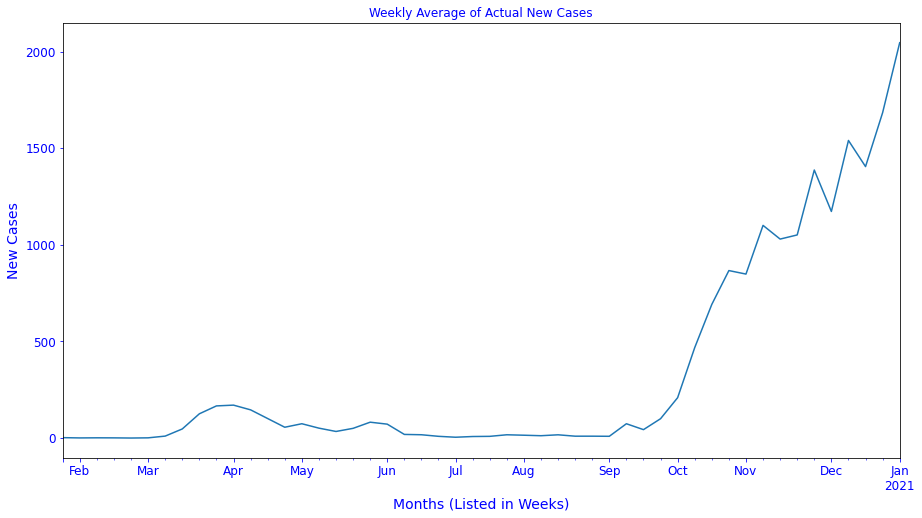

In [31]:
#Plotting the series for weekly average of new cases
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

ax=cases_ts_weekly_avg.plot(label='Actual New Cases',figsize=(15, 8))
ax.set_xlabel('Months (Listed in Weeks)')
ax.set_ylabel('New Cases')
ax.set_title('Weekly Average of Actual New Cases')
plt.show()

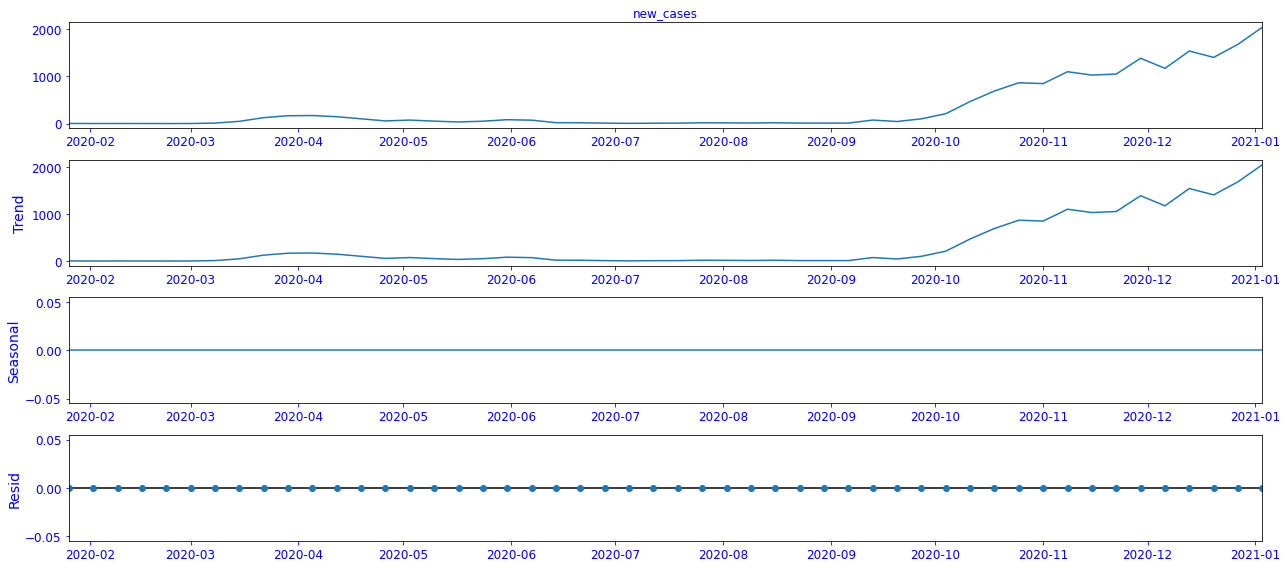

In [32]:
#decomposed time series to get components Trend, Seasonality &  Noise
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(cases_ts_weekly_avg, model='additive', extrapolate_trend='freq', period=1)
fig = decomposition.plot()
plt.show()

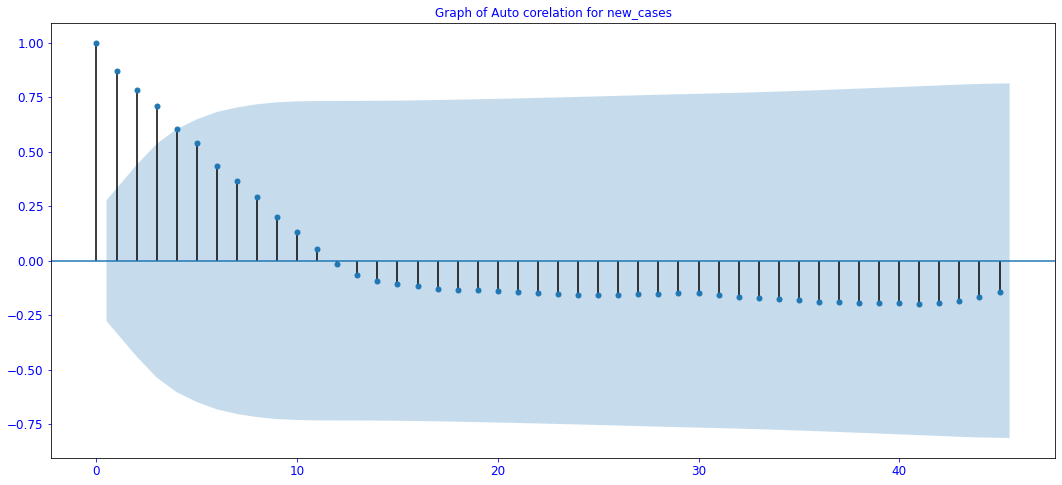

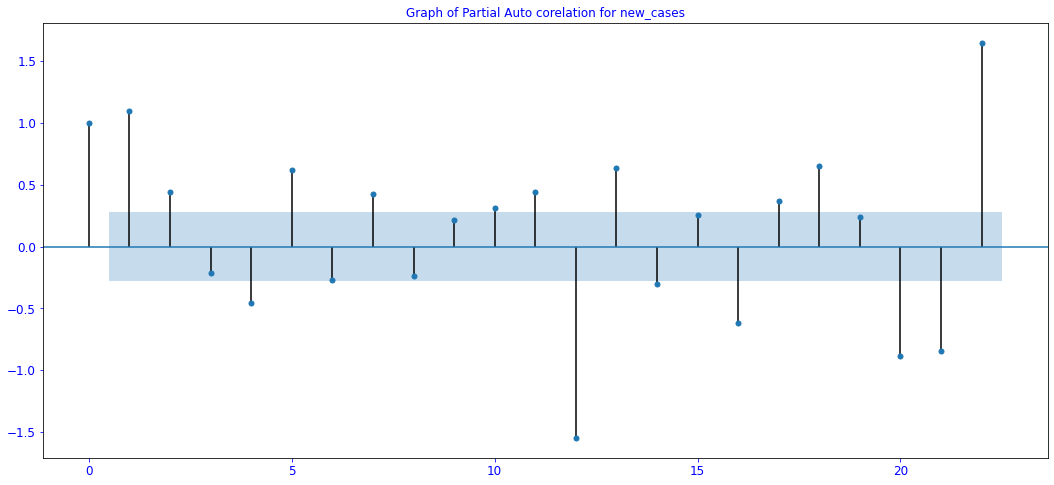

In [33]:
# Plotting the Auto Correlation Function(ACF) and Partial Auto Correlation Function(PACF) Plot of the Trend and Seasonally adjusted Time Series data
#to determine  p and seasonal P, q and seasonal Q
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Plot the autocorrelation function

plot_acf(cases_ts_weekly_avg,use_vlines=True,title='Graph of Auto corelation for new_cases', lags=45)
mpl.pyplot.show()
#The trendwas initially decreasing in initial few weeks and then it started increasing . The change in trend results in change in corelation.
#ACF plot Spikes at lag =1 means a probable Autoregressive(AR)  order of 1 and seasonal AR order of 1

#Plots lags on the horizontal and the partial correlations on vertical axis for time-series data using method='ols'.
plot_pacf(cases_ts_weekly_avg,use_vlines=True,method='ols' ,title='Graph of Partial Auto corelation for new_cases', lags=22)
mpl.pyplot.show()
#PACF plot spikes at lag=1 and then spikes at lag=10 & lag=20, which means a probable Moving Average(MA) order of 1 or 2 and seasonal MA order of 1 

In [34]:
#apply adf test and kpss test on the series to check whether series is stationery
print(print_adf_result(cases_ts_weekly_avg))
print(print_kpss_result(cases_ts_weekly_avg))
#ADF: if the p-value is less than the critical value , the series is stationary
#P valie is 0.99 whihc is not less than critical value of 0.05 so statistically we can confirm that the series is not stationary.
#Hence, we would do first-order differencing for the trend and re-run the ADF test to check for stationarity.

Results of Dickey-Fuller Test:
Test Statistic                  2.527069
p-value                         0.999058
#Lags Used                      4.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.405789
p-value                   0.074660
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


In [35]:
#Doing First Order differencing
ts_cases_adj = cases_ts_weekly_avg - cases_ts_weekly_avg.shift(1)
#ts_cases_adj =cases_ts_weekly_avg
ts_cases_adj = ts_cases_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_cases_adj))
print(print_kpss_result(ts_cases_adj))
#For first oder differencing p =0.15 NOT less than 0.05 so going for second order differencing

Results of Dickey-Fuller Test:
Test Statistic                  0.864603
p-value                         0.992611
#Lags Used                     10.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.433610
p-value                   0.062668
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


In [36]:
#Doing Second Order differencing
ts_cases_adj = cases_ts_weekly_avg - cases_ts_weekly_avg.shift(2)
#ts_cases_adj =cases_ts_weekly_avg
ts_cases_adj = ts_cases_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_cases_adj))
print(print_kpss_result(ts_cases_adj))
#For Second oder differencing p =0.90 NOT less than 0.05 so going for Third order differencing

Results of Dickey-Fuller Test:
Test Statistic                 -0.239447
p-value                         0.933653
#Lags Used                      8.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.434182
p-value                   0.062421
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


In [37]:
#Doing Third Order differencing
ts_cases_adj = cases_ts_weekly_avg - cases_ts_weekly_avg.shift(3)
#ts_cases_adj =cases_ts_weekly_avg
ts_cases_adj = ts_cases_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_cases_adj))
print(print_kpss_result(ts_cases_adj))
#For Third oder differencing p =0.41 NOT less than 0.05 so going for Fourth order differencing

Results of Dickey-Fuller Test:
Test Statistic                  0.829517
p-value                         0.992098
#Lags Used                      9.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.402184
p-value                   0.076214
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


In [38]:
#Doing fourth Order differencing
ts_cases_adj = cases_ts_weekly_avg - cases_ts_weekly_avg.shift(4)
#ts_cases_adj =cases_ts_weekly_avg
ts_cases_adj = ts_cases_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_cases_adj))
print(print_kpss_result(ts_cases_adj))
#For Fourth order differencing p =0.73 NOT less than 0.05 so going for Fifth order differencing

Results of Dickey-Fuller Test:
Test Statistic                 -0.343366
p-value                         0.919134
#Lags Used                      4.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.397748
p-value                   0.078126
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


In [39]:
#Doing Fifth Order differencing
ts_cases_adj = cases_ts_weekly_avg - cases_ts_weekly_avg.shift(5)
#ts_cases_adj =cases_ts_weekly_avg
ts_cases_adj = ts_cases_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_cases_adj))
print(print_kpss_result(ts_cases_adj))
#For Fifth oder differencing p =0.65 NOT less than 0.05 so going for Sixth order differencing

Results of Dickey-Fuller Test:
Test Statistic                 -0.373013
p-value                         0.914508
#Lags Used                      7.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.378264
p-value                   0.086524
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


In [40]:
#Doing Sixth Order differencing
ts_cases_adj = cases_ts_weekly_avg - cases_ts_weekly_avg.shift(6)
#ts_cases_adj =cases_ts_weekly_avg
ts_cases_adj = ts_cases_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_cases_adj))
print(print_kpss_result(ts_cases_adj))
#For Sixth oder differencing p =0.001 which is less than 0.05 so the series is now trend stationary

Results of Dickey-Fuller Test:
Test Statistic                  1.167763
p-value                         0.995755
#Lags Used                      6.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.378179
p-value                   0.086561
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


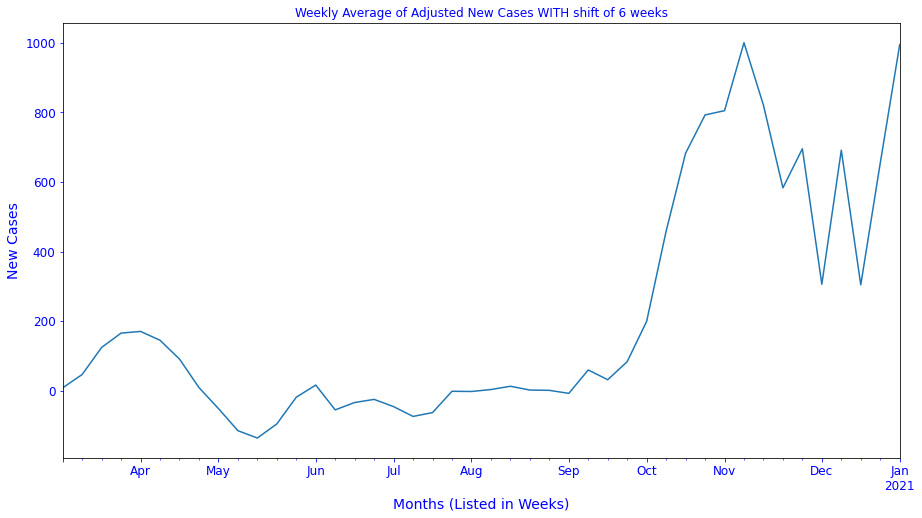

In [41]:
# Plotting the adjusted new_cases with shift of 6 weeks
ax=ts_cases_adj.plot(figsize=(15, 8))
ax.set_xlabel('Months (Listed in Weeks)')
ax.set_ylabel('New Cases')
ax.set_title('Weekly Average of Adjusted New Cases WITH shift of 6 weeks')
plt.show()

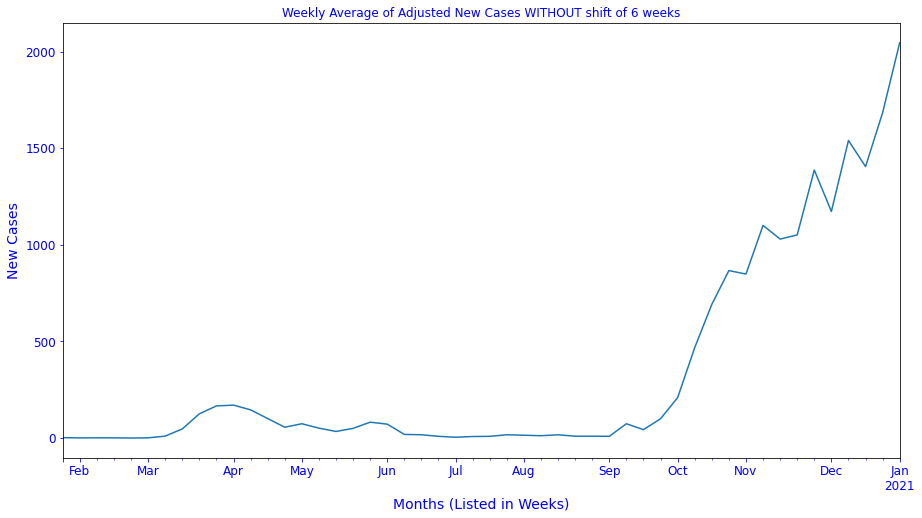

In [42]:
# Plotting the adjusted new_cases without shift of 6 weeks.
# In the above graph I tried using differencing to test the shifting values.
#But as you can see it shows drop in the cases in later months which is not the case. Thus discarding the differencing values
# I consider only the average value and it gives the accurate picture.
ts_cases_adj=cases_ts_weekly_avg
ax=ts_cases_adj.plot(figsize=(15, 8))
ax.set_xlabel('Months (Listed in Weeks)')
ax.set_ylabel('New Cases')
ax.set_title('Weekly Average of Adjusted New Cases WITHOUT shift of 6 weeks')
plt.show()

In [43]:
import itertools
import statsmodels.api as sm
#The variables p,P,d,D,q,Q are defined as under
#p and seasonal P: indicate the number of AR terms (lags of the stationary series)
#d and seasonal D: indicate differencing that must be done to stationary series
#q and seasonal Q: indicate the number of MA terms (lags of the forecast errors)
#lag: indicates the seasonal length in the data
#setting prameters for SARIMA

p = range(0, 3)
d = range(1,2)
q = range(0, 4)

pdq = list(itertools.product(p, d, q))
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
seasonal_pdq


[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3)]
Examples of parameter combinations for Seasonal SARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (0, 1, 3, 12)


[(0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12)]

In [44]:
#Performing a grid search with the list of possible values around our estimated parameters. We have to  pick the model with the least AIC.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_cases = sm.tsa.statespace.SARIMAX(ts_cases_adj,
                                            order=param,
                                            seasonal_order=param_seasonal,)
            results = mod_cases.fit(method = 'powell')
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
#AIC (Akaike information criterion) is an estimator of the relative quality of statistical models for a given set of data

Optimization terminated successfully.
         Current function value: 4.689378
         Iterations: 2
         Function evaluations: 37
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:470.937838164385
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:nan


C:\Users\Saira\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Optimization terminated successfully.
         Current function value: 4.685895
         Iterations: 2
         Function evaluations: 68
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:474.58954112888296
Optimization terminated successfully.
         Current function value: 4.686115
         Iterations: 3
         Function evaluations: 137
SARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:476.61152972779547
Optimization terminated successfully.
         Current function value: 4.688043
         Iterations: 2
         Function evaluations: 44
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:472.80426563447213
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:nan


C:\Users\Saira\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Optimization terminated successfully.
         Current function value: 4.685880
         Iterations: 2
         Function evaluations: 89
SARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:476.5880063409751
Optimization terminated successfully.
         Current function value: 4.684986
         Iterations: 3
         Function evaluations: 167
SARIMA(0, 1, 0)x(1, 1, 3, 12)12 - AIC:478.49863799822475
Optimization terminated successfully.
         Current function value: 4.685860
         Iterations: 3
         Function evaluations: 100
SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:474.586049996574
SARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:nan


C:\Users\Saira\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Optimization terminated successfully.
         Current function value: 4.685862
         Iterations: 2
         Function evaluations: 113
SARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:478.5861551105405
Optimization terminated successfully.
         Current function value: 4.684766
         Iterations: 3
         Function evaluations: 199
SARIMA(0, 1, 0)x(2, 1, 3, 12)12 - AIC:480.4766183107068
Optimization terminated successfully.
         Current function value: 4.677730
         Iterations: 2
         Function evaluations: 44
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:471.7730470155444
Optimization terminated successfully.
         Current function value: 4.672678
         Iterations: 2
         Function evaluations: 65
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:473.2678342087113
Optimization terminated successfully.
         Current function value: 4.670939
         Iterations: 2
         Function evaluations: 89
SARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:475.09387926714066
Optimization terminated successf

In [45]:
#getting values which has minimum AIC for the time series data
#SARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:409.6382686540549

mod_cases = sm.tsa.statespace.SARIMAX(ts_cases_adj,
                                            order=(0, 1, 2),
                                seasonal_order=(0, 1, 0, 12))
#Fitting model using POWELL method: Powell method, is an algorithm proposed  for finding a local minimum of a function
results_cases = mod_cases.fit(method = 'powell')
#Print the results
print(results_cases.summary().tables[1])


Optimization terminated successfully.
         Current function value: 4.531971
         Iterations: 3
         Function evaluations: 111
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1408      0.095     -1.486      0.137      -0.327       0.045
ma.L2          0.6227      0.119      5.218      0.000       0.389       0.857
sigma2       1.19e+04   2429.748      4.898      0.000    7139.719    1.67e+04


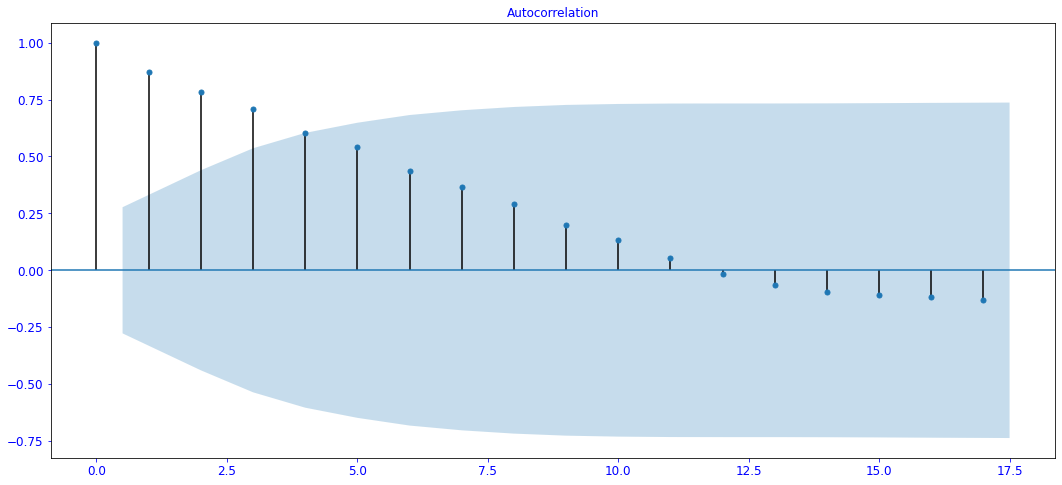

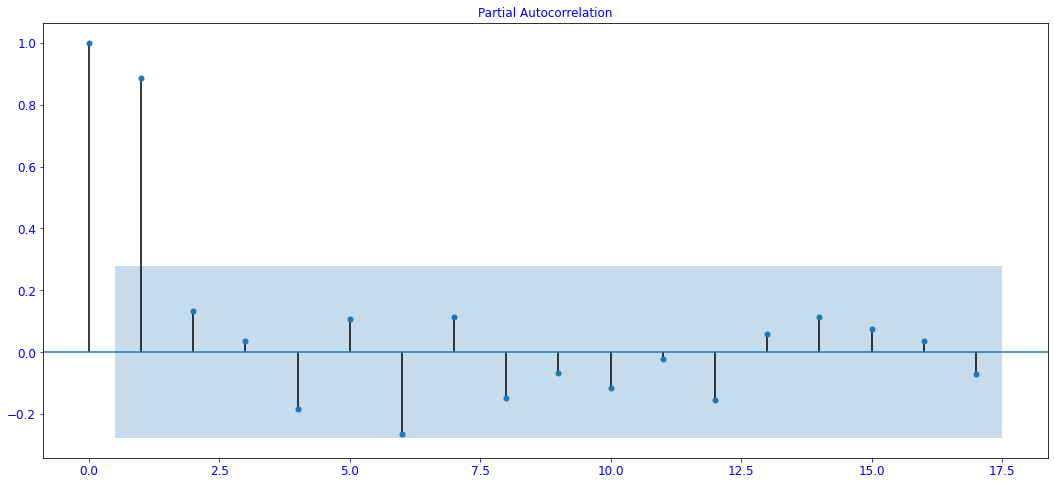

In [46]:
# Plotting the ACF and PACF Plot of the Trend and Seasonally adjusted Time Series data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_cases_adj)
mpl.pyplot.show()
plot_pacf(ts_cases_adj)
mpl.pyplot.show()

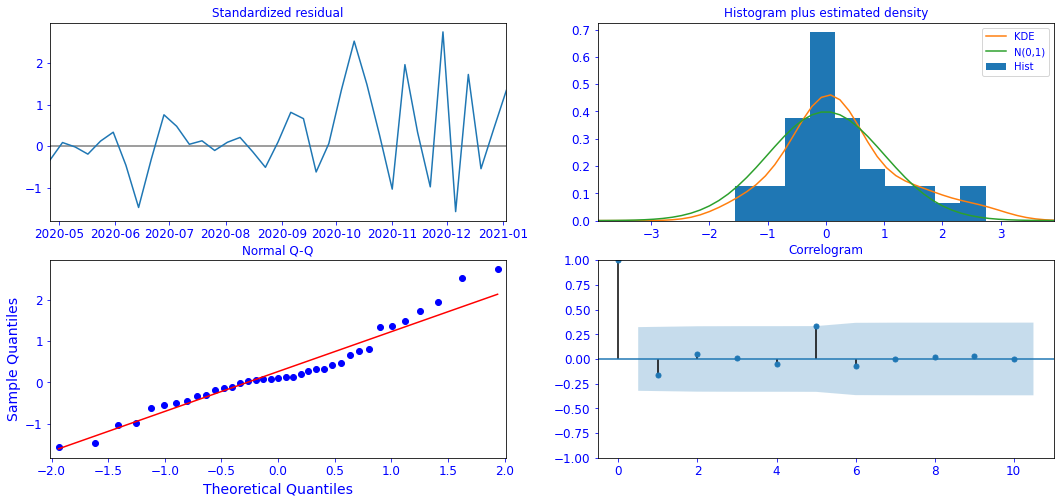

In [47]:
#Plotting Standard residual for the new_cases, HIstogram plot of the cases and Density plot, Normal Q-Q and corelogram
results_cases.plot_diagnostics(figsize=(18, 8))
plt.show()

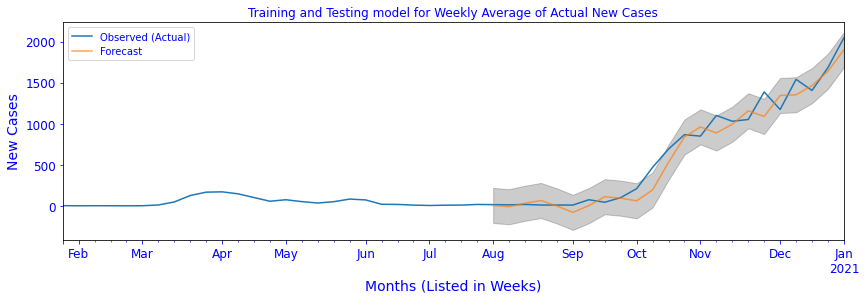

In [48]:
#Training the Model and testing against the actual data
pred_cases = results_cases.get_prediction(start=pd.to_datetime('2020-08-02'), dynamic=False)
#Valudate the Model versus the actual data
pred_ci_cases = pred_cases.conf_int()
#fig, ax = plt.subplots()


ax = ts_cases_adj.plot(label='Observed (Actual)')
pred_cases.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci_cases.index,
                pred_ci_cases.iloc[:, 0],
                pred_ci_cases.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Months (Listed in Weeks)')
ax.set_ylabel('New Cases')
ax.set_title('Training and Testing model for Weekly Average of Actual New Cases')

#ax.hlines(y=1000, xmin=4, xmax=1000, linewidth=2, color='r')


plt.legend()
plt.show()

In [49]:
#Calculate the predicted results versus actual values
y_forecasted_cases = pred_cases.predicted_mean
y_truth_cases = ts_cases_adj['2020-08-02':]
#Calculate Mean Squared Error
mse = ((y_forecasted_cases - y_truth_cases) ** 2).mean()
mse=round(mse, 2)
print('The Mean Squared Error is {}'.format(mse))
#Calculate Root Mean Squared Error
rmse=round(np.sqrt(mse), 2)
print('The Root Mean Squared Error is {}'.format(rmse))
#Calculate R-squared Error or Coefficient of Determination:The % variation of y on variation with x
from sklearn.metrics import r2_score 
r_squared=r2_score(y_truth_cases, y_forecasted_cases)
print('R-squared Error is {}'.format(r_squared))

#Since the R squared error is approximately 0.92 closer to 1 the model can predict the values of future cases with a narrow margin of error
#prediction model accuracy is 92.23% which is acceptable.

The Mean Squared Error is 17293.89
The Root Mean Squared Error is 131.51
R-squared Error is 0.9578445270008342


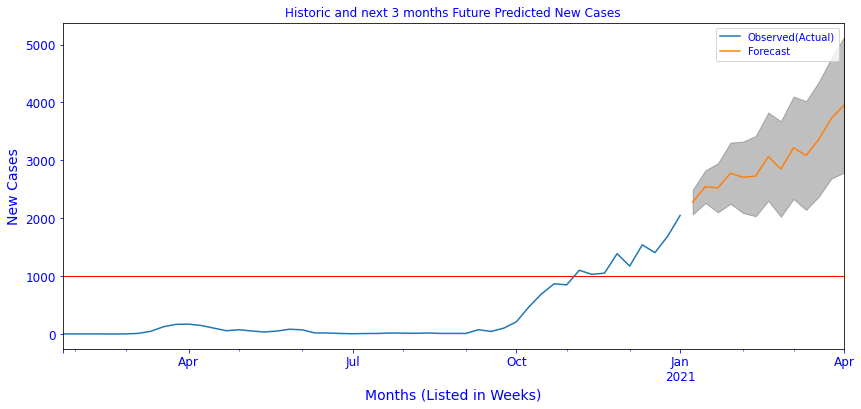

In [50]:
# Displaying Historic and Future Predict results for next 3 months.
pred_uc_cases = results_cases.get_forecast(steps=13)
pred_ci_cases = pred_uc_cases.conf_int(0.5)
ax = ts_cases_adj.plot(label='Observed(Actual)', figsize=(14, 6))
pred_uc_cases.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_cases.index,
                pred_ci_cases.iloc[:, 0],
                pred_ci_cases.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Months (Listed in Weeks)')
ax.set_ylabel('New Cases')
ax.set_title('Historic and next 3 months Future Predicted New Cases')
plt.legend()

ax.hlines(y=1000, xmin=pd.to_datetime('2020-01-02'), xmax=pd.to_datetime('2021-04-02'), linewidth=1, color='r')

plt.show()
#Since we are preicting weekly average the value is calcualted weekly . The gap in graph shows a period between 
# week 03-Jan-2021 to 09-Jan-2021 but there are NO missing values.

In [51]:
#pred_ci[['lower new_cases', 'upper new_cases']]
pred_ci_cases['mean new_cases']=pred_ci_cases.mean(axis=1)
pred_ci_cases.round()

,lower new_cases,upper new_cases,mean new_cases
2021-01-10,2063.0,2491.0,2277.0
2021-01-17,2261.0,2825.0,2543.0
2021-01-24,2101.0,2949.0,2525.0
2021-01-31,2248.0,3307.0,2777.0
2021-02-07,2089.0,3323.0,2706.0
2021-02-14,2034.0,3421.0,2728.0
2021-02-21,2301.0,3826.0,3064.0
2021-02-28,2024.0,3675.0,2849.0
2021-03-07,2332.0,4101.0,3217.0
2021-03-14,2142.0,4021.0,3081.0


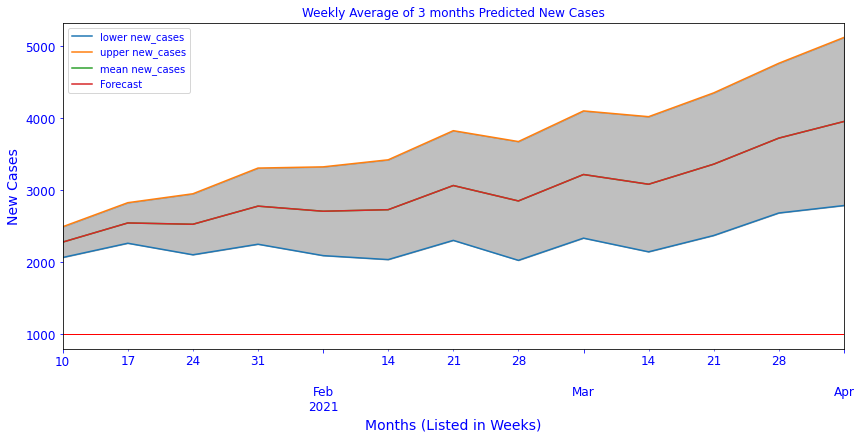

In [52]:
# 3 months Future Predicted results of New Cases

ax = pred_ci_cases.plot(label='Observed(Actual)', figsize=(14, 6))
pred_uc_cases.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_cases.index,
                pred_ci_cases.iloc[:, 0],
                pred_ci_cases.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Months (Listed in Weeks)')
ax.set_ylabel('New Cases')
ax.set_title('Weekly Average of 3 months Predicted New Cases')
plt.legend()

ax.hlines(y=1000, xmin=pd.to_datetime('2020-01-02'), xmax=pd.to_datetime('2021-04-02'), linewidth=1, color='r')

plt.show()
#Since we are preicting weekly average the value is calcualted weekly

In [53]:
pred_ci_cases.filter('')
df_result_cases=pred_ci_cases[(pred_ci_cases['lower new_cases'] <=1000.0) | (pred_ci_cases['upper new_cases'] <=1000.0)]
#df_result = pred_ci[(pred_ci['mean new_cases'] <=1000.0)]

print("Weeks where the number of new Cases are less than or equal to 1000 per day")
df_result_cases

Weeks where the number of new Cases are less than or equal to 1000 per day


,lower new_cases,upper new_cases,mean new_cases


In [54]:
#check average for 2 consecutive weeks and say if Malaysia could achieve Objective of 1000 cases/day in next 3 months
biweekly_day_average_meet=False
for index, row in pred_ci_cases.iterrows():
    if ((pred_ci_cases.loc[index,'lower new_cases']+pred_ci_cases.loc[index,'upper new_cases'])/2) <=1000:
        if ((pred_ci_cases.loc[(index-1),'lower new_cases']+pred_ci_cases.loc[(index-1),'upper new_cases'])/2) <=1000:
            biweekly_day_average_meet=True
            print("Malaysia could achieve 14 days average of below 100 cases per day within the next 3 months for weeks ",pred_ci_cases.loc[index],pred_ci_cases.loc[(index - 1)])
if(biweekly_day_average_meet==False):
    print("Based on current trend of data it seems difficult that Malaysia would achieve trend on 1000 cases per day in next 3 months")

Based on current trend of data it seems difficult that Malaysia would achieve trend on 1000 cases per day in next 3 months


### There is not even a single week where average is less than 1000 cases /day
### Based on current trend of data it seems difficult that Malaysia would achieve trend on 1000 cases per day in next three months


# Objective-2

## Considering current trend of COVID-19 tests in Malaysia, I want to determine the number of COVID-19 test kits that would be required each week in Malaysia, over next 3 months

In [55]:
#Filterout columns 'date','new_tests'
df_new_test=df[['date','new_tests']]
df_new_test

,date,new_tests
31632,2020-01-25,0.0
31633,2020-01-26,0.0
31634,2020-01-27,0.0
31635,2020-01-28,0.0
31636,2020-01-29,0.0
...,...,...
31971,2020-12-29,19954.0
31972,2020-12-30,25812.0
31973,2020-12-31,25812.0
31974,2021-01-01,25812.0


In [56]:
#set index the data frame by ‘Date 
df_new_test=df_new_test.set_index('date')
df_new_test

,new_tests
date,
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0
2020-01-28,0.0
2020-01-29,0.0
...,...
2020-12-29,19954.0
2020-12-30,25812.0
2020-12-31,25812.0


In [57]:
#aggregate the data from daily to Weekly in order to carry out the analysis
tests_ts_weekly_avg = df_new_test['new_tests'].resample('W').mean()
#W : weekly frequency
#M : month end frequency
#SM : semi-month end frequency (15th and end of month)
#Q : quarter end frequency
tests_ts_weekly_avg

date
2020-01-26        0.000000
2020-02-02        0.000000
2020-02-09        0.000000
2020-02-16       93.714286
2020-02-23       53.142857
2020-03-01       94.857143
2020-03-08       91.857143
2020-03-15      505.142857
2020-03-22      772.000000
2020-03-29     2722.714286
2020-04-05     1886.428571
2020-04-12     4850.285714
2020-04-19     3771.571429
2020-04-26     3942.714286
2020-05-03     9191.714286
2020-05-10     8729.142857
2020-05-17    26618.000000
2020-05-24     9202.714286
2020-05-31     6500.142857
2020-06-07     7666.285714
2020-06-14     6356.714286
2020-06-21     4660.571429
2020-06-28     9426.000000
2020-07-05     7795.428571
2020-07-12     6141.714286
2020-07-19     6033.428571
2020-07-26     6843.000000
2020-08-02     5933.285714
2020-08-09     9542.571429
2020-08-16     9752.857143
2020-08-23     8881.428571
2020-08-30     9589.142857
2020-09-06     9130.571429
2020-09-13     9242.857143
2020-09-20    10361.714286
2020-09-27     9386.285714
2020-10-04    14950.142

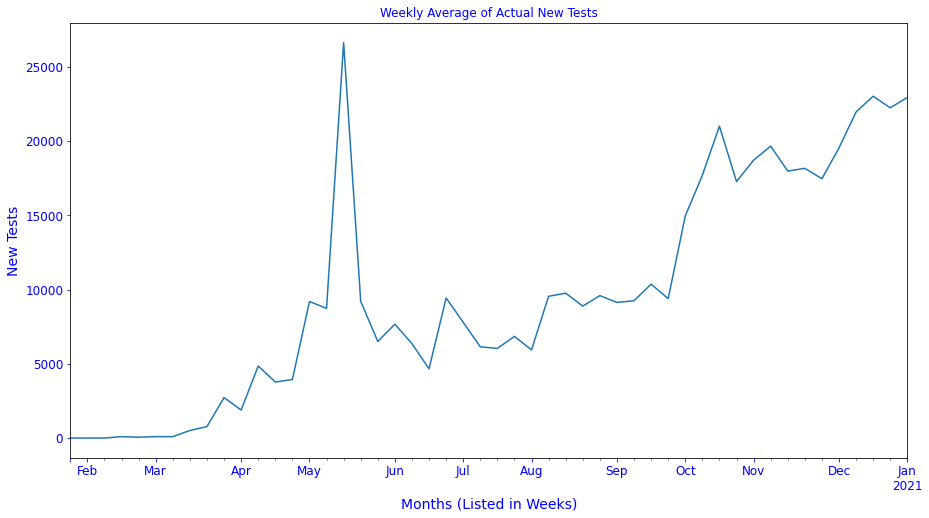

In [58]:
#Plotting the series
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

ax=tests_ts_weekly_avg.plot(figsize=(15, 8))
ax.set_xlabel('Months (Listed in Weeks)')
ax.set_ylabel('New Tests')
ax.set_title('Weekly Average of Actual New Tests')
plt.show()

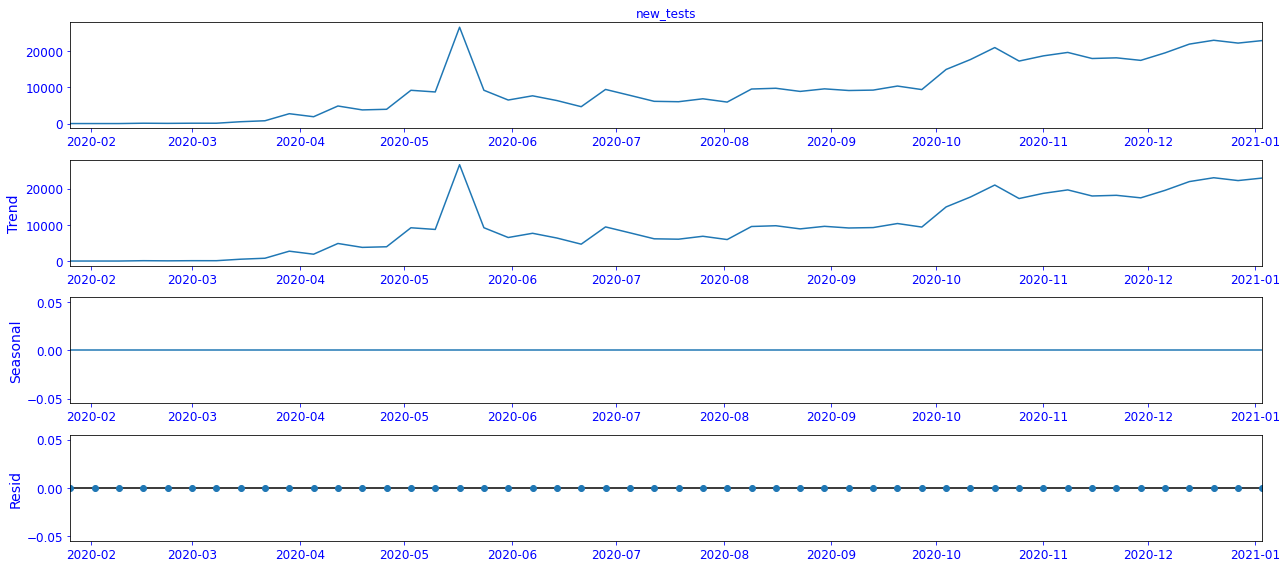

In [59]:
#decomposed time series to get components Trend, Seasonality &  Noise
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(tests_ts_weekly_avg, model='additive', extrapolate_trend='freq', period=1)
fig = decomposition.plot()
plt.show()

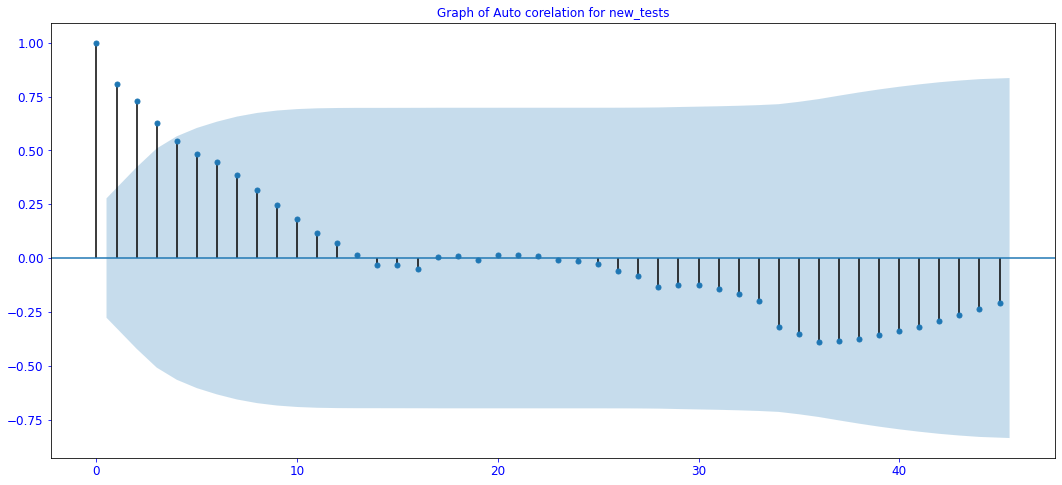

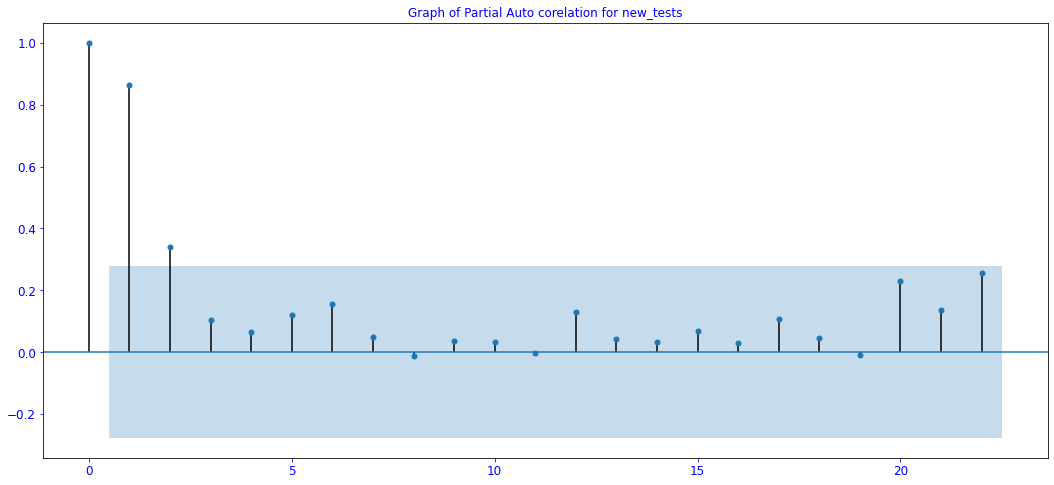

In [60]:
# Plotting the Auto Correlation Function(ACF) and Partial Auto Correlation Function(PACF) Plot of the Trend and Seasonally adjusted Time Series data
#to determine  p and seasonal P, q and seasonal Q
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Plot the autocorrelation function

plot_acf(tests_ts_weekly_avg,use_vlines=True,title='Graph of Auto corelation for new_tests', lags=45)
mpl.pyplot.show()
#The trendwas initially decreasing in initial few weeks and then it started increasing . The change in trend results in change in corelation.
#ACF plot Spikes at lag =1 means a probable Autoregressive(AR)  order of 1 and seasonal AR order of 1

#Plots lags on the horizontal and the partial correlations on vertical axis for time-series data using method='ols'.
plot_pacf(tests_ts_weekly_avg,use_vlines=True,method='ols' ,title='Graph of Partial Auto corelation for new_tests', lags=22)
mpl.pyplot.show()
#PACF plot spikes at lag=1 and lag=4 and then spikes at lag=21, which means a probable Moving Average(MA) order of 1 or 2 and seasonal MA order of 1 


In [61]:
#apply adf test and kpss test on the series to check whether series is stationery
print(print_adf_result(tests_ts_weekly_avg))
print(print_kpss_result(tests_ts_weekly_avg))
#ADF: if the p-value is less than the critical value , the series is stationary
#P value is 0.08 whihc is not less than critical value of 0.05 so statistically we can confirm that the series is not stationary.
#Hence, we would do first-order differencing for the trend and re-run the ADF test to check for stationarity.

Results of Dickey-Fuller Test:
Test Statistic                 -1.058050
p-value                         0.731508
#Lags Used                      1.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.511405
p-value                   0.039098
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


In [62]:
#Doing First Order differencing
ts_tests_adj = tests_ts_weekly_avg - tests_ts_weekly_avg.shift(1)
#ts_cases_adj =cases_ts_weekly_avg
ts_tests_adj = ts_tests_adj.dropna()
#ts_cases_adj.plot()
print(print_adf_result(ts_tests_adj))
print(print_kpss_result(ts_tests_adj))
#For first oder differencing p =6.271783e-13  less than 0.05 so ploting the graph

Results of Dickey-Fuller Test:
Test Statistic                -1.019022e+01
p-value                        6.351149e-18
#Lags Used                     0.000000e+00
Number of Observations Used    4.800000e+01
Critical Value (1%)           -3.574589e+00
Critical Value (5%)           -2.923954e+00
Critical Value (10%)          -2.600039e+00
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.127339
p-value                   0.100000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


C:\Users\Saira\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


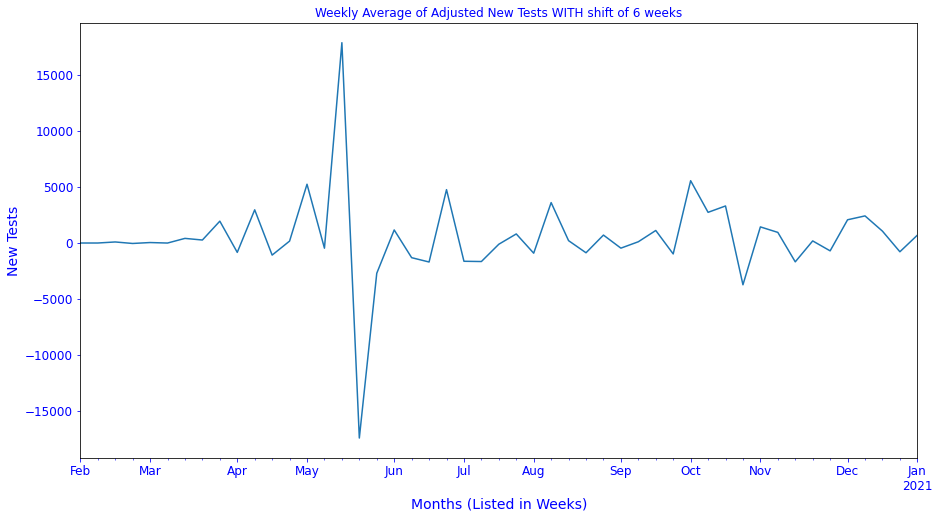

In [63]:
# Plotting the adjusted New Tests with shift of 6 weeks


ax=ts_tests_adj.plot(figsize=(15, 8))
ax.set_xlabel('Months (Listed in Weeks)')
ax.set_ylabel('New Tests')
ax.set_title('Weekly Average of Adjusted New Tests WITH shift of 6 weeks')
plt.show()

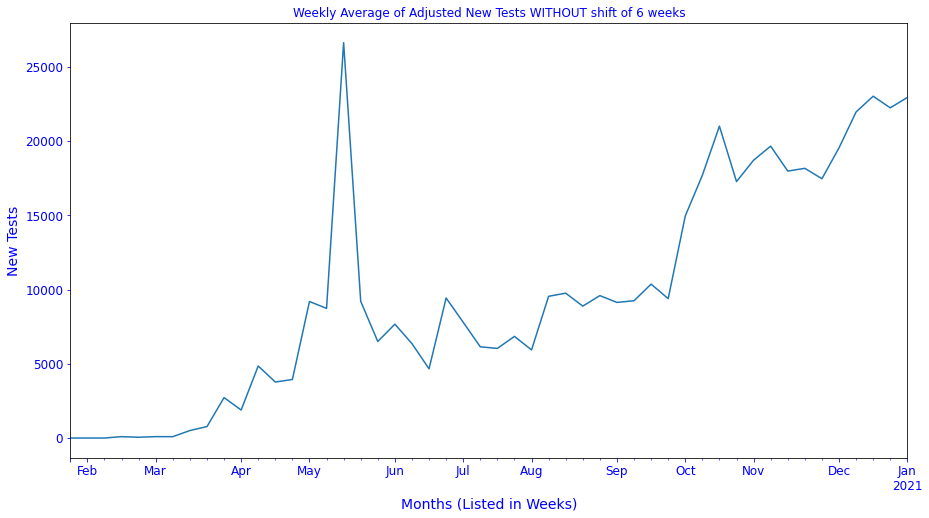

In [64]:
# Plotting the adjusted New Tests WITHOUT shift of 6 weeks.
# In the above graph I tried using differencing to test the shifting values.
#But as you can see the differencing gives a non zero value for second half of May 2020 which is not the case.
# Thus discarding the differencing values. I consider only the average value and it gives the accurate picture.


ts_tests_adj=tests_ts_weekly_avg
ax=ts_tests_adj.plot(figsize=(15, 8))
ax.set_xlabel('Months (Listed in Weeks)')
ax.set_ylabel('New Tests')
ax.set_title('Weekly Average of Adjusted New Tests WITHOUT shift of 6 weeks')
plt.show()

In [65]:
import itertools
import statsmodels.api as sm
#The variables p,P,d,D,q,Q are defined as under
#p and seasonal P: indicate the number of AR terms (lags of the stationary series)
#d and seasonal D: indicate differencing that must be done to stationary series
#q and seasonal Q: indicate the number of MA terms (lags of the forecast errors)
#lag: indicates the seasonal length in the data
#setting prameters for SARIMA

p = range(0, 3)
d = range(1,2)
q = range(0, 4)

pdq = list(itertools.product(p, d, q))
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
seasonal_pdq


[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3)]
Examples of parameter combinations for Seasonal SARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (0, 1, 3, 12)


[(0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12)]

In [66]:
# Performing a grid search with the list of possible values around our estimated parameters.
# We have to  pick the model with the least AIC.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_tests_adj,
                                            order=param,
                                            seasonal_order=param_seasonal,)
            results = mod.fit(method = 'powell')
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
#AIC (Akaike information criterion) is an estimator of the relative quality of statistical models for a given set of data

Optimization terminated successfully.
         Current function value: 7.511627
         Iterations: 2
         Function evaluations: 37
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:753.1627235089499


C:\Users\Saira\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:nan
Optimization terminated successfully.
         Current function value: 7.246738
         Iterations: 4
         Function evaluations: 158
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:730.6738351254846
Optimization terminated successfully.
         Current function value: 7.233447
         Iterations: 4
         Function evaluations: 200
SARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:731.3447388434581
Optimization terminated successfully.
         Current function value: 7.411918
         Iterations: 2
         Function evaluations: 60
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:745.1917781908458


C:\Users\Saira\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:nan
Optimization terminated successfully.
         Current function value: 7.250082
         Iterations: 7
         Function evaluations: 350
SARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:733.0081622834816
Optimization terminated successfully.
         Current function value: 7.192676
         Iterations: 6
         Function evaluations: 391
SARIMA(0, 1, 0)x(1, 1, 3, 12)12 - AIC:729.2675553214378
Optimization terminated successfully.
         Current function value: 6.974222
         Iterations: 3
         Function evaluations: 118
SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:703.4221970711296
SARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:nan


C:\Users\Saira\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Optimization terminated successfully.
         Current function value: 6.970498
         Iterations: 6
         Function evaluations: 369
SARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:707.049763183168
Optimization terminated successfully.
         Current function value: 6.969939
         Iterations: 6
         Function evaluations: 439
SARIMA(0, 1, 0)x(2, 1, 3, 12)12 - AIC:708.9939191755926
Optimization terminated successfully.
         Current function value: 7.450836
         Iterations: 2
         Function evaluations: 58
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:749.083617080608
Optimization terminated successfully.
         Current function value: 7.233834
         Iterations: 4
         Function evaluations: 159
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:729.3833942716705
Optimization terminated successfully.
         Current function value: 7.176172
         Iterations: 4
         Function evaluations: 202
SARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:725.6171606934569
Optimization terminated successfu

In [67]:
#getting values which has minimum AIC for the time series data
#SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:645.4777029543509


mod = sm.tsa.statespace.SARIMAX(ts_tests_adj,
                                            order=(0, 1, 2),
                                seasonal_order=(2, 1, 0, 12))
#Fitting model using POWELL method: Powell method, is an algorithm proposed  for finding a local minimum of a function
results = mod.fit(method = 'powell')
#Print the results
print(results.summary().tables[1])

Optimization terminated successfully.
         Current function value: 6.958823
         Iterations: 6
         Function evaluations: 362
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2217      0.136     -1.630      0.103      -0.488       0.045
ma.L2          0.0003      0.191      0.002      0.999      -0.374       0.375
ar.S.L12      -0.9635      0.076    -12.731      0.000      -1.112      -0.815
ar.S.L24      -0.9611      0.013    -76.286      0.000      -0.986      -0.936
sigma2      3.671e+06   2.51e-09   1.46e+15      0.000    3.67e+06    3.67e+06


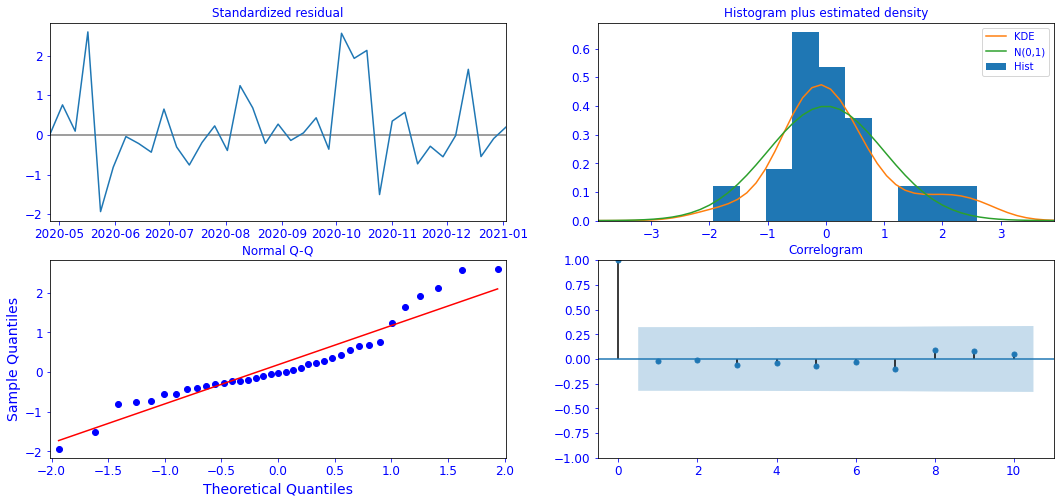

In [68]:
#Plotting Standard residual for the new_cases, HIstogram plot of the cases and Density plot, Normal Q-Q and corelogram
results.plot_diagnostics(figsize=(18, 8))
plt.show()

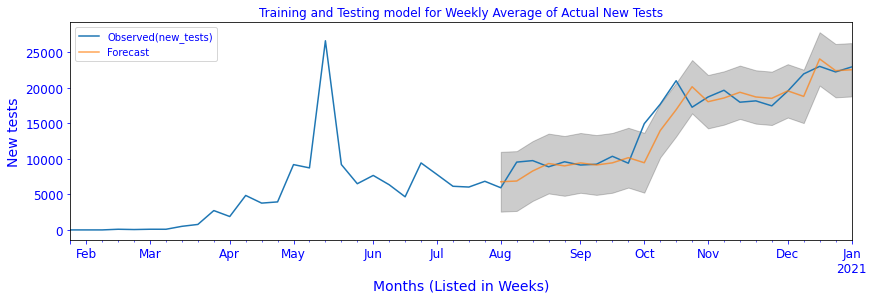

In [69]:
#Valudate the Model versus the actual data

pred = results.get_prediction(start=pd.to_datetime('2020-08-02'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts_tests_adj.plot(label='Observed(new_tests)')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Months (Listed in Weeks)')
ax.set_ylabel('New tests')
ax.set_title('Training and Testing model for Weekly Average of Actual New Tests')
plt.legend()
plt.show()

In [70]:
#Calculate the predicted results versus actual values
y_forecasted = pred.predicted_mean
y_truth = ts_tests_adj['2020-08-02':]
#Calculate Mean Squared Error
mse = ((y_forecasted - y_truth) ** 2).mean()
mse=round(mse, 2)
print('The Mean Squared Error is {}'.format(mse))
#Calculate Root Mean Squared Error
rmse=round(np.sqrt(mse), 2)
print('The Root Mean Squared Error is {}'.format(rmse))
#Calculate R-squared Error or Coefficient of Determination:The % variation of y on variation with x
from sklearn.metrics import r2_score 
r_squared=r2_score(y_truth, y_forecasted)
print('R-squared Error is {}'.format(r_squared))

#Since the R squared error is approximately 0.78 closer to 1 the model can predict the values of future cases with a narrow margin of error
#prediction model accuracy is 77.98% which is acceptable.

The Mean Squared Error is 4231172.97
The Root Mean Squared Error is 2056.98
R-squared Error is 0.8568827004558673


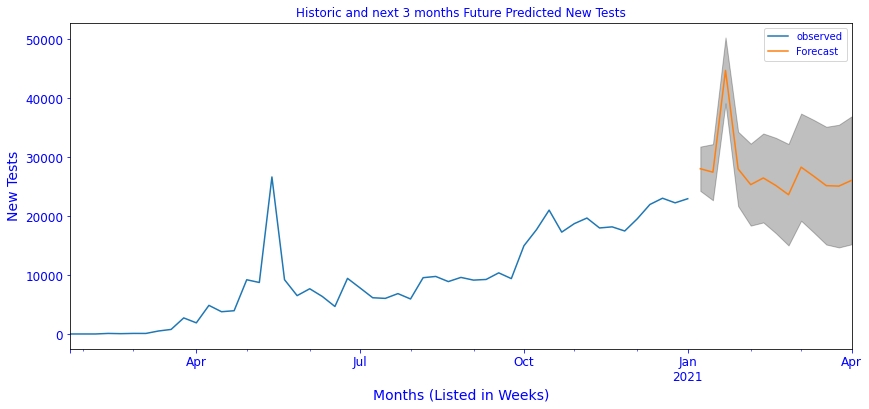

In [75]:
#Future Predict the results of new Tests for next 3 months

pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = ts_tests_adj.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Months (Listed in Weeks)')
ax.set_ylabel('New Tests')
ax.set_title('Historic and next 3 months Future Predicted New Tests')
plt.legend()
plt.show()
#Since we are preicting weekly average the value is calcualted weekly . The gap in graph shows a period between 
# week 03-Jan-2021 to 09-Jan-2021 but there are NO missing values.

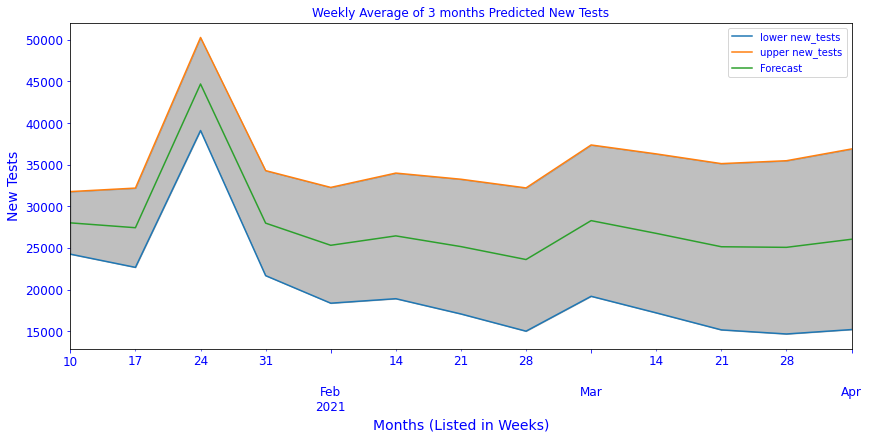

In [76]:
#Future Predict the results for next 3 months

ax = pred_ci.plot(label='Observed(Actual)', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Months (Listed in Weeks)')
ax.set_ylabel('New Tests')
ax.set_title('Weekly Average of 3 months Predicted New Tests')
plt.legend()

#ax.hlines(y=1000, xmin=pd.to_datetime('2020-01-02'), xmax=pd.to_datetime('2021-04-02'), linewidth=1, color='r')

plt.show()
#Since we are preicting weekly average the value is calcualted on every Sunday . The gap in graph shows aperiod between 
#on a gap of a week 06-Dec-2020 to 13-Dec-2020 but there is NO missing values.

In [83]:
#Use mean of Max and minimum values to calculate number of kits required for next 16 weeks
pred_ci['kits_required']=pred_ci.mean(axis=1)*7

kits_required=pred_ci['kits_required'].round()
pred_ci

,lower new_tests,upper new_tests,kits_required
2021-01-10,24255,31766,3638196
2021-01-17,22668,32186,3562481
2021-01-24,39096,50267,5803625
2021-01-31,21674,34283,3634090
2021-02-07,18368,32267,3288460
2021-02-14,18907,33987,3435140
2021-02-21,17074,33249,3268189
2021-02-28,15008,32207,3066329
2021-03-07,19195,37362,3673070
2021-03-14,17206,36290,3474245


## Kits required for next 3 months (10th January 2021 to 4th April 2021)

In [82]:
import math
cumulative_sum=0

sum=kits_required[0:3].sum()
Kits = [sum]
cumulative_sum+=sum
print('Number of kits required for next month is {} '.format(sum))
sum=kits_required[4:7].sum()
Kits.append(sum)
cumulative_sum+=sum
print('Number of kits required for second month is {} '.format(sum))
sum=kits_required[8:11].sum()

Kits.append(sum)
cumulative_sum+=sum
Kits.append(cumulative_sum)
print('Number of kits required for third month is {} '.format(sum))

print('Cumulative test cases for next three months is {}'.format(cumulative_sum))
kits_df = pd.DataFrame(Kits,index=['10 Jan 2021 to 07 Feb 2021', 
                                 '14 Feb 2021 to 07 March 2021','14 March 2021 to 4 April 2021','CUMULATIVE'],columns = ['Required Test Kits'])
pd.options.display.float_format = '{:.0f}'.format

kits_df

Number of kits required for next month is 5373035.0 
Number of kits required for second month is 4128344.0 
Number of kits required for third month is 4302415.0 
Cumulative test cases for next three months is 13803794.0


,Required Test Kits
10 Jan 2021 to 07 Feb 2021,5373035
14 Feb 2021 to 07 March 2021,4128344
14 March 2021 to 4 April 2021,4302415
CUMULATIVE,13803794
